In [40]:
import sys
import os
import math

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# uncomment the following line if 'imutils' is not installed in your python kernel
# !{sys.executable} -m pip install imutils
import imutils
from imutils import paths


import keras
from keras.layers import Dense, Conv2D, BatchNormalization, Dropout, Activation, MaxPooling2D, Flatten
from keras.models import Sequential, load_model
from keras.losses import categorical_crossentropy, binary_crossentropy
from keras.optimizers import Adam
from keras.utils import np_utils
from keras.regularizers import l2
from keras import regularizers
from keras.callbacks import ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import img_to_array
from keras.applications.mobilenet_v2 import preprocess_input
from keras.preprocessing.image import load_img
from keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer

import cv2
import time
import random
import shutil

In [42]:
data_path = 'dataset'
mask_path = 'dataset/with_mask'
nomask_path = 'dataset/without_mask'
test_path = 'test'
train_path = 'train'

In [43]:
def view(path):
    images = list()
    for img in random.sample(os.listdir(path),9):
        images.append(img)
    i = 0
    fig,ax = plt.subplots(nrows=3, ncols=3, figsize=(20,10))
    for row in range(3):
        for col in range(3):
            ax[row,col].imshow(cv2.imread(os.path.join(path,images[i])))
            i+=1

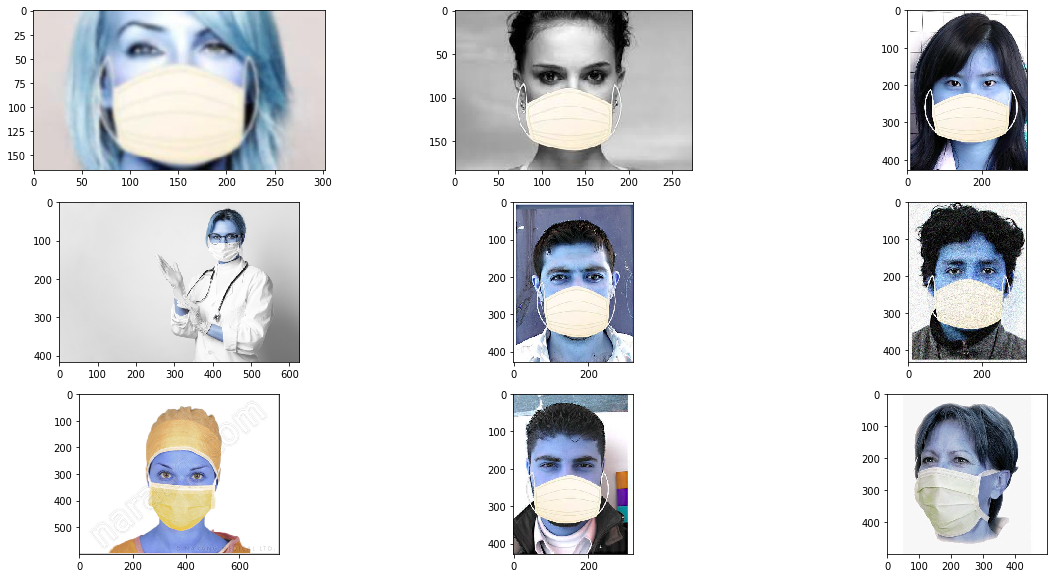

In [44]:
view(mask_path)

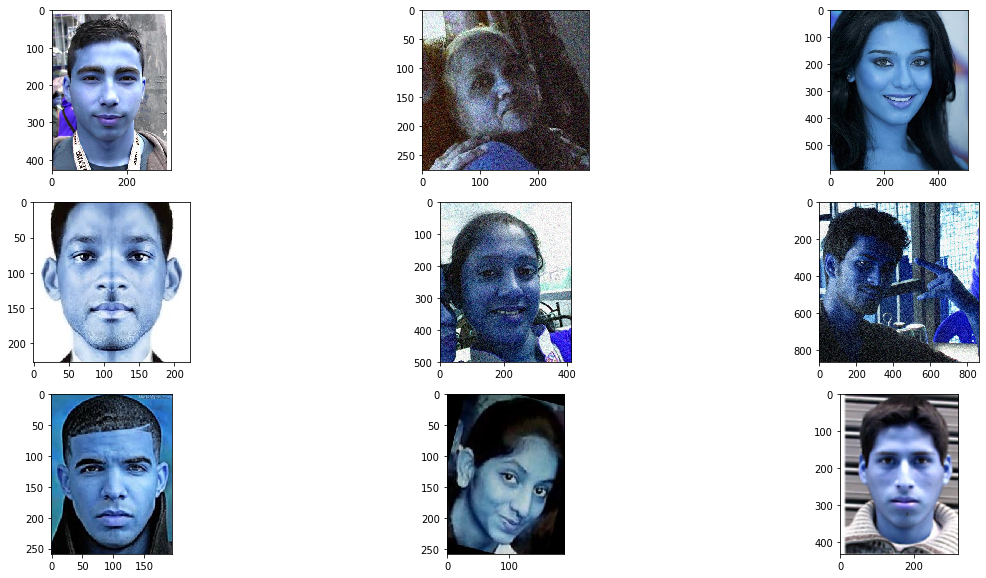

In [45]:
view(nomask_path)

In [46]:
INIT_LR = 1e-4
EPOCHS = 20
BS = 32

In [47]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=20,
        shear_range=0.2,
        zoom_range=0.2,
        width_shift_range=0.2,
        height_shift_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)


training_set = train_datagen.flow_from_directory(
        'train',
        target_size=(img_size,img_size),
        batch_size=batch_size,
        class_mode='binary')


test_set = test_datagen.flow_from_directory(
        'test',
        target_size=(img_size,img_size),
        batch_size=batch_size,
        class_mode='binary')

Found 1314 images belonging to 2 classes.
Found 194 images belonging to 2 classes.


In [48]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import argparse
import os

In [49]:
baseModel = MobileNetV2(weights="imagenet", include_top=False, input_tensor=Input(shape=(224, 224, 3)))

9412608/9406464 [==============================] - 2s 0us/step


In [80]:
headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(7, 7))(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(128, activation="relu")(headModel)
headModel = Dropout(0.3)(headModel)
headModel = Dense(1, activation="sigmoid")(headModel)

In [81]:
model = Model(inputs=baseModel.input, outputs=headModel)

In [82]:
for layer in baseModel.layers:
    layer.trainable = False

In [83]:
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

In [84]:
history=model.fit(training_set, steps_per_epoch=34, validation_data=test_set, validation_steps=6, epochs=20)

Epoch 1/20
34/34 [==============================] - 95s 3s/step - loss: 0.1042 - accuracy: 0.9603 - val_loss: 0.0171 - val_accuracy: 0.9948
Epoch 2/20
34/34 [==============================] - 93s 3s/step - loss: 0.0484 - accuracy: 0.9830 - val_loss: 0.0120 - val_accuracy: 0.9948
Epoch 3/20
34/34 [==============================] - 86s 3s/step - loss: 0.0218 - accuracy: 0.9915 - val_loss: 0.0152 - val_accuracy: 0.9948
Epoch 4/20
34/34 [==============================] - 93s 3s/step - loss: 0.0297 - accuracy: 0.9896 - val_loss: 0.0112 - val_accuracy: 0.9948
Epoch 5/20
34/34 [==============================] - 98s 3s/step - loss: 0.0194 - accuracy: 0.9934 - val_loss: 0.0135 - val_accuracy: 0.9896
Epoch 6/20
34/34 [==============================] - 94s 3s/step - loss: 0.0109 - accuracy: 0.9972 - val_loss: 0.0136 - val_accuracy: 0.9896
Epoch 7/20
34/34 [==============================] - 107s 3s/step - loss: 0.0115 - accuracy: 0.9963 - val_loss: 0.0104 - val_accuracy: 0.9948
Epoch 8/20
34/34 [=

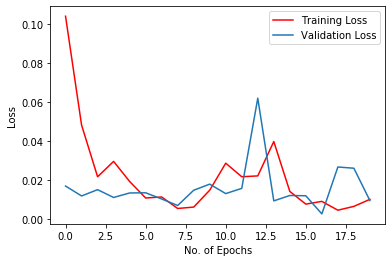

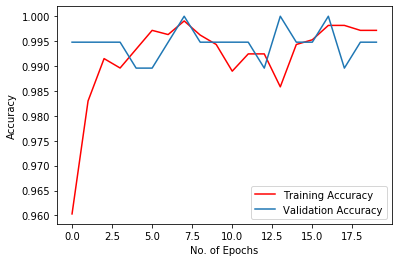

In [85]:
plt.plot(history.history['loss'],'r',label='Training Loss')
plt.plot(history.history['val_loss'],label='Validation Loss')
plt.xlabel('No. of Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plotting the accuracy on validation set w.r.t the number of epochs
plt.plot(history.history['accuracy'],'r',label='Training Accuracy')
plt.plot(history.history['val_accuracy'],label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [86]:
model.save('mobilenetmodel1.h5', history)

In [2]:
!pip install dlib


  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\akhil\miniconda3\python.exe' -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\akhil\\AppData\\Local\\Temp\\pip-install-fqvgmn8r\\dlib\\setup.py'"'"'; __file__='"'"'C:\\Users\\akhil\\AppData\\Local\\Temp\\pip-install-fqvgmn8r\\dlib\\setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\akhil\AppData\Local\Temp\pip-wheel-e800il5t'
       cwd: C:\Users\akhil\AppData\Local\Temp\pip-install-fqvgmn8r\dlib\
  Complete output (53 lines):
  running bdist_wheel
  running build
  running build_py
  package init file 'tools\python\dlib\__init__.py' not found (or not a regular file)
  running build_ext
  Traceback (most recent call last):
    File "C:\Users\akhil\AppData\Local\Temp\pip-install-fqvgmn8r\dlib\setup.py", line 120, in get_cmake_version
      out = sub


  Using cached dlib-19.21.0.tar.gz (3.2 MB)
  Running setup.py clean for dlib
Failed to build dlib
    Running setup.py install for dlib: started
    Running setup.py install for dlib: finished with status 'error'
